# minuteSleep_merged Dataset

Data Exploration:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/minuteSleep_merged.csv'
df_sleep = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df_sleep.head())


           Id                  date  value        logId
0  1503960366  4/12/2016 2:47:30 AM      3  11380564589
1  1503960366  4/12/2016 2:48:30 AM      2  11380564589
2  1503960366  4/12/2016 2:49:30 AM      1  11380564589
3  1503960366  4/12/2016 2:50:30 AM      1  11380564589
4  1503960366  4/12/2016 2:51:30 AM      1  11380564589


In [2]:
# Display basic information about the dataset
print(df_sleep.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB
None


In [3]:
# Check for missing values
print(df_sleep.isnull().sum())

Id       0
date     0
value    0
logId    0
dtype: int64


Data Preprocessing

In [4]:
# Handling missing values, filling missing values with the median
df_sleep['value'].fillna(df_sleep['value'].median(), inplace=True)

# Convert 'date' to datetime format
df_sleep['date'] = pd.to_datetime(df_sleep['date'])

Data Cleaning

In [5]:
# Remove duplicates if any
df_sleep.drop_duplicates(inplace=True)

Data Visualization

KeyboardInterrupt: 

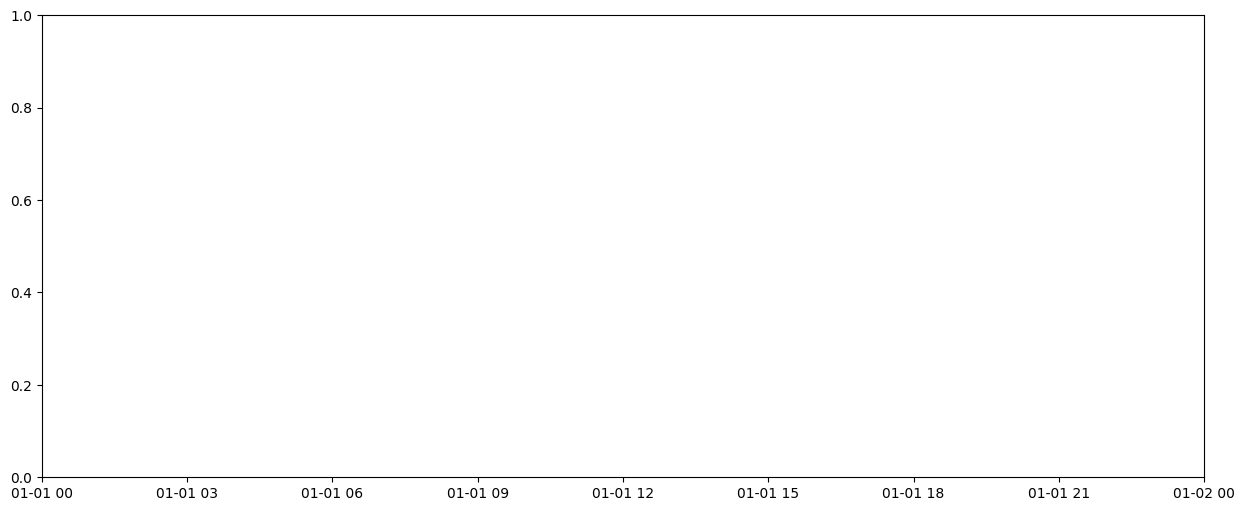

In [6]:
# Time series plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='value', data=df_sleep)
plt.title('Sleep Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Value')
plt.show()

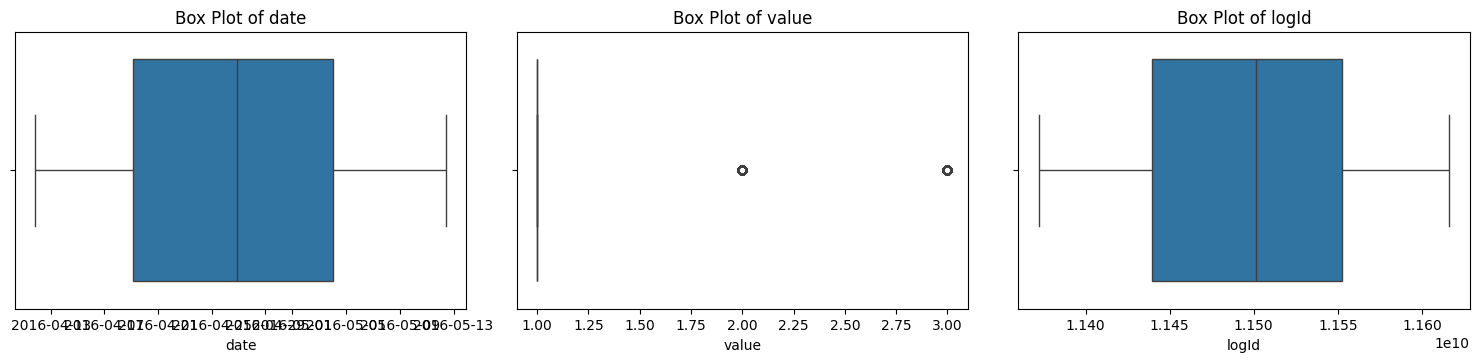

In [7]:
# Box plot for all columns in 'minuteSleep_merged'
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_sleep.columns[1:]):  # Exclude 'Id' column
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=column, data=df_sleep)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


Removing Outliers

In [12]:
# We are applying capping
df_sleepUpperLimit = 1.001

df_sleep['value'] = df_sleep['value'].clip(upper=df_sleepUpperLimit)
print("Capped Value:")
print(df_sleep['value'].describe())

Capped Value:
count    187978.000000
mean          1.000085
std           0.000279
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.001000
Name: value, dtype: float64


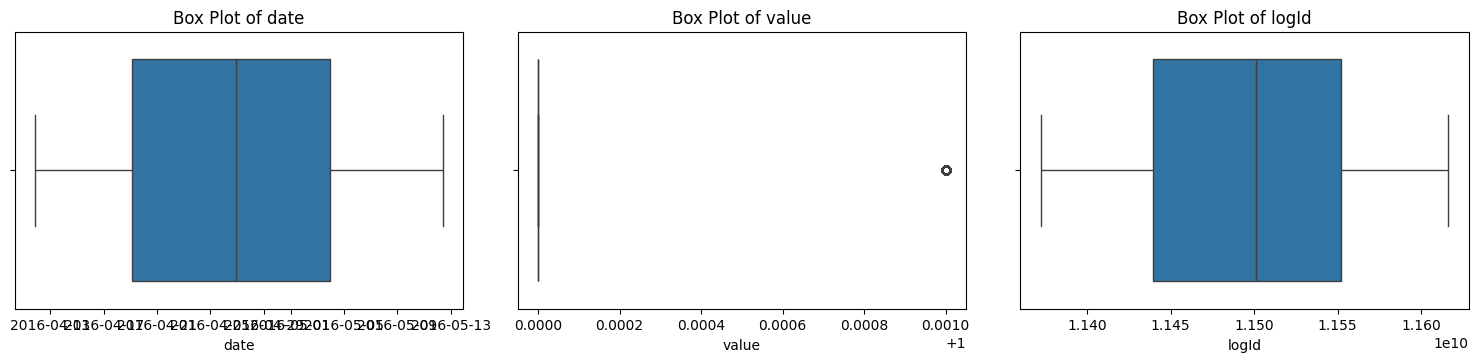

In [13]:
# Box plot for all columns in 'minuteSleep_merged'
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_sleep.columns[1:]):  # Exclude 'Id' column
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=column, data=df_sleep)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [14]:
# df_minute_intensities_wide is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteSleep_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
df_sleep.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteSleep_merged_Filtered.csv
